## Eric He

## Numerical Analysis

## Assignment 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
sns.set_style('whitegrid')

# 1.
Let $P_n$ be the
  space of functions defined on $[-1,1]$ that can be
  described by polynomials of degree less of equal to $n$ with
  coefficients in $\mathbb R$.  $P_n$ is a linear space in the sense
  of linear algebra, in particular, for $p,q\in P_n$ and $a\in \mathbb
  R$, also $p+q$ and $ap$ are in $P_n$. Since the monomials
  $\{1,x,x^2,\ldots,x^{n}\}$ are a basis for $P_n$, the dimension of
  that space is $n+1$.

## a)
Show that for pairwise distinct points $x_0,x_1,\ldots,x_n \in
    [-1,1]$, the Lagrange polynomials $L_k(x)$ are in $P_n$, and
    that they are linearly independent, that is, for a linear
    combination of the zero polynomial with Lagrange polynomials with
    coefficients $\alpha_k$, i.e.,
    $$
    \sum_{k=0}^n\alpha_kL_k(x) = 0 \text{ (the zero polynomial)}
    $$
    necessarily follows that $\alpha_0=\alpha_1=\ldots=\alpha_n=0$. Note
    that this implies that the $(n+1)$ Lagrange polynomials also form
    a basis of $P_n$.

### Answer

Fix an interpolation point $x_i$ such that $x_i \neq 0$; we know there exists at least $n-1$ since the $x_i$'s are distinct. All Lagrange polynomials $L_k(x)$ save $L_i(x)$ take on the value $0$ at $x = i$, and at $x_i$, $L_i(x) \neq 0$. This means that for a linear combination of the Lagrange polynomials to be $0$, the coefficient $\alpha_i$ for $L_i(x)$ must be $0$.

We can repeat this argument for $n-1$ interpolation points, thus requiring $n-1$ of the Lagrange polynomials to have coefficient $0$. Then for the last Lagrange polynomial to be equal to the zero polynomial, the coefficient for that polynomial must also be $0$, since that last polynomial is nonzero for points which are not interpolation points.

## b)
Since both the monomials and the Lagrange polynomials are a
    basis of $P_n$, each $p\in P_n$ can be written as linear
    combination of monomials as well as Lagrange polynomials, i.e.,
    $$ p(x) = \sum_{k=0}^n\alpha_kL_k(x) = \sum_{k=0}^n\beta_k x^k, $$ with
    appropriate coefficients $\alpha_k,\beta_k\in \mathbb R$.  As
    you know from basic matrix theory, there exists a basis
    transformation matrix that converts the coefficients $\alpha=(\alpha_0,\ldots,\alpha_n)^T$ to the coefficients $
    \beta=(\beta_0,\ldots,\beta_n)^T$. Show that this basis
    transformation matrix is given by the so-called Vandermonde matrix
    $V\in\mathbb R^{n+1\times n+1}$ given by
$$ V = \begin{pmatrix}
  1 & x_0 & x_0^2 & \cdots & x_0^{n-1} &
  x_0^{n}\\
  1 & x_1 & x_1^2 & \cdots & x_1^{n-1} &
  x_1^{n}\\
  \vdots & \vdots  & \vdots & \ddots & \vdots & \vdots\\
  1 & x_n & x_n^2 & \cdots & x_n^{n-1} &
  x_n^{n}
\end{pmatrix}, $$ 
    i.e., the relation between $ \alpha$ and $\beta$ is given by $\alpha = V \beta$. An easy
    way to see this is to choose appropriate $x$.

### Answer

Let $x_0, x_1, ..., x_n$ be the $n$ points at which $L_0(x), L_1(x), ..., L_n(x)$ are evaluated. Then the corresponding $V$ simply evaluates the polynomial, defined by its vector of coefficients $\beta$, at the points $x_0, x_1, ..., x_n$. If $V\beta = \alpha$, then the polynomial at $x=x_i$ evaluates to $y=\alpha_i$. But every $L_j(x_i) = 0$ for $j \neq i$, and $L_i(x_i) = 1$. Then for $p(x)$ to be properly expressed in the basis of $L_k(x)$ polynomials, the corresponding coefficient for $L_k(x)$ can only be $\alpha_k$.

Since the question is ambiguous about whether the transformation matrix is going from $\alpha$ to $\beta$ or vice versa (the Vandermonde sends $\beta$ to $\alpha$), the matrix for the inverse transform is also given below.

Choosing $p(x)$ to be any of the $L_k(x)$, it is obvious that $\alpha_i = 0$ for $i \neq k$, and $\alpha_k = 1$. Thus for $p(x)$ to equal $L_k(x)$, the corresponding $\alpha$ is the $k$th basis vector. 

Now this means that $V^{-1}$ must send the $k$th basis vector to the vector of coefficients of $L_k(x)$. Then the $k$th column of $V^{-1}$ is the vector of coefficients of $L_k(x)$.

## c)

Note that since $V$ transforms one basis into another basis, it
  must be an invertible matrix. Let us compute the condition number of
  $V$ numerically. Compute the 2-based condition number
  $\kappa_2(V)$ for $n=5,10,20,30$ with uniformly spaced nodes
  $x_i=- 1+(2i)/n$, $i=0,\ldots,n$. Based on the condition
  numbers, can this basis transformation be performed accurately?

In [16]:
n = [5, 10, 20, 30]
cond_numbers = []
for i in n:
    x = -1 + 2*np.arange(i + 1)/i
    cond_numbers.append(np.linalg.cond(np.vander(x, i+1), p=2))
    
cond_numbers

[63.82728259639298, 13951.62693148976, 831377049.0515671, 56415868942024.77]

Clearly the condition numbers are too high for the basis transformation to be accurately computed.

# 2.

### a)

Write down the least squares problem associated to finding the
  cubic best fit polynomial
  $$
  Y = ax^3 + bX^2 + c X + d\;.
  $$
  using (i) all six points, (ii) only the data for
  $i=0,1,2,3,4$, and (iii) $i=0,1,2,3$. In each case solve the system
  and plot both the data points and the polynomial. Why is case (iii) not a
  least squares problem?

The least squares problem for the first 6 data points is as follows:
0.0 = 0.0a + 0.0b + 0.0c + d
0.2 = 0.125a + 0.25b + 0.5c + d
0.27 = 1.0a + 1.0b + 1.0c + d
0.3 = 3.375a + 2.25b + 1.5c + d
0.32 = 8.0a + 4.0b + 2.0c + d
0.33 = 15.625a + 6.25b + 2.5c + d

The least squares problem for the first 5 data points is as follows:
0.0 = 0.0a + 0.0b + 0.0c + d
0.2 = 0.125a + 0.25b + 0.5c + d
0.27 = 1.0a + 1.0b + 1.0c + d
0.3 = 3.375a + 2.25b + 1.5c + d
0.32 = 8.0a + 4.0b + 2.0c + d

The least squares problem for the first 4 data points is as follows:
0.0 = 0.0a + 0.0b + 0.0c + d
0.2 = 0.125a + 0.25b + 0.5c + d
0.27 = 1.0a + 1.0b + 1.0c + d
0.3 = 3.375a + 2.25b + 1.5c + d



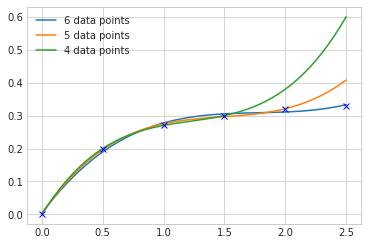

In [35]:
def equation(x):
    return np.array([x**3, x**2, x, 1])

A = np.array([equation(0),
              equation(0.5),
              equation(1.),
              equation(1.5),
              equation(2.),
              equation(2.5)])

b = np.array([0., 0.2, 0.27, 0.3, 0.32, 0.33])
x_ = np.arange(6) / 2

x = np.linspace(0, 2.5)

for i in [6, 5, 4]:
    print('The least squares problem for the first {} data points is as follows:'.format(i))
    for j in range(i):
        print('{} = {}a + {}b + {}c + d'.format(b[j], A[j, 0], A[j, 1], A[j, 2]))
    print('')
    
    Q, R = np.linalg.qr(A[:i, :])
    coef = np.linalg.solve(R, np.dot(Q.T, b[:i]))
    
    y = coef[0] * x**3 + coef[1] * x**2 + coef[2] * x + coef[3]
    plt.plot(x, y, label='{} data points'.format(i))
    
plt.plot(x_, b, 'bx')
plt.legend()

The case of 4 data points is not a least squares problem because the degree 3-polynomial is able to perfectly fit all 4 data points, so there is no error to begin with.

## b)

What is the degree of the polynomial that you would have to use so that the solution interpolates (i.e., goes through) *all* six data points?

### Answer

Since an $n$-degree polynomial has $n+1$ degrees of freedom, a $5$-degree polynomial will be able to interpolate all $6$ data points.

# 3)
Let us interpolate the function $f:[0,1]\to\mathbb R$ defined by
  $f(x) = \exp(3x)$ using the nodes $x_i=i/2$, $i=0,1,2$ by a
  quadratic polynomial $p_2\in  P_2$.

## a)

Use the monomial basis $1,x,x^2$ and compute (numerically) the
  coefficients $c_j\in \mathbb R$ such that $p_2(x) =
  \sum_{j=0}^2c_jx^j$. Plot $p_2$ and $f$ in the same graph.
  
  ### Answer

In [36]:
def f(x):
    return np.exp(3*x)

In [42]:
x_ = np.array([0, 0.5, 1.])

y_ = f(x_)

coef = np.polyfit(x_, y_, 2)
coef

array([24.24431757, -5.15878064,  1.        ])

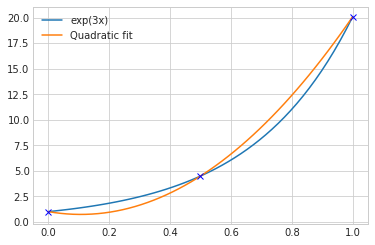

In [41]:
x = np.linspace(0, 1)
y_true = f(x)
y_fit = np.polyval(coef, x)

plt.plot(x, y_true, label='exp(3x)')
plt.plot(x, y_fit, label='Quadratic fit')
plt.plot(x_, y_, 'bx')
plt.legend()

## b)

Give an alternative form for $p_2$ using Lagrange interpolation
  polynomials $L_0(x)$, $L_1(x)$ and $L_2(x)$. Plot the three Lagrange
  basis polynomials in the same graph.
  
### Answer

$L_0(x) = \dfrac{(x - \frac{1}{2})(x - 1)}{( - \frac{1}{2})( - 1)} = 2x^2 - 3x + 1$

$L_1(x) = \dfrac{(x)(x - 1)}{(\frac{1}{2})(\frac{1}{2} - 1)} = -4x^2 + 4x$

$L_2(x) = \dfrac{(x)(x - \frac{1}{2})}{(1)(1 - \frac{1}{2})} = 2x^2 - x$

Exact coefficients for these polynomials can be computed numerically since we know their values at 3 points each.

Then $p_2 = L_0 + e^{3/2}L_1 + e^3L_2$.

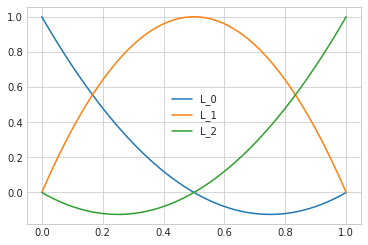

In [49]:
x = np.linspace(0, 1)

coef_0 = np.array([2, -3, 1])
coef_1 = np.array([-4, 4, 0])
coef_2 = np.array([2, -1, 0])

y_0 = np.polyval(coef_0, x)
y_1 = np.polyval(coef_1, x)
y_2 = np.polyval(coef_2, x)

plt.plot(x, y_0, label='L_0')
plt.plot(x, y_1, label='L_1')
plt.plot(x, y_2, label='L_2')
plt.legend()

## c)

Compare the exact interpolation error $E_f(x):=f(x)-p_2(x)$ at
  $x=3/4$ with the estimate
  \begin{equation*}
  |E_f(x)|\le \frac{M_{n+1}}{(n+1)!}|\pi_{n+1}(x)|,
  \end{equation*}
  where $M_{n+1} = \max_{z\in [0,1]}|f^{(n+1)}(z)|$, $f^{(n+1)}$ is
  the $(n+1)$st derivative of $f$, and
  $\pi_{n+1}(x)=(x-x_0)(x-x_1)(x-x_2)$.
  
  ### Answer

In [56]:
# calculate the true interpolation error
y_true = np.exp(3 * 0.75)
y_p = np.polyval(coef, 0.75)

np.abs(y_true - y_p)

1.2806073125903925

$|f^{n+1}(z)| = 3^4e^{3z}$

$M_{n+1} = 3^4e^3$

$(n + 1)! = 4! = 24$

$\pi_{n+1}(0.75) = (0.75)(0.25)(0.25) = \dfrac{3}{4^3}$

In [55]:
# calculate the upper bound on the interpolation error
3**4 * np.exp(3) / 24 * 3 / 4**3

3.177594708551174

The true interpolation error is 1.28, whereas the upper bound on the interpolation error is 3.178

## d)

Find a (Hermite) polynomial $p_3\in P_3$ that interpolates
  $f$ and $f'$ in $x_0,x_1$. Give the polynomial $p_3$ in the Hermite
  basis, plot $f$ and $p_3$ in the same graph, and plot the four
  Hermite basis functions in another graph.

### Answer

In [140]:
coefs = [coef_0, coef_1, coef_2]
coef_derivatives = [np.polyder(coef) for coef in coefs]
x_ks = [0., 1/2, 1.]
y_ks = np.exp(3 * np.array(x_ks))
z_ks = 3 * np.exp(3 * np.array(x_ks))

def H(coef, coef_derivative, x_k):
    coef_sq = np.polymul(coef, coef)
    deriv = np.polyval(coef_derivative, x_k)
    _ = [-2 * deriv, 2 * x_k * deriv + 1]
    
    return np.polymul(coef_sq, _)

def K(coef, x_k):
    coef_sq = np.polymul(coef, coef)
    _ = [1, -1 * x_k]
    return np.polymul(coef_sq, _)

In [142]:
hs = []
ks = []
ps = []
for i in range(3):
    hs.append(H(coefs[i], coef_derivatives[i], x_ks[i]))
    ks.append(K(coefs[i], x_ks[i]))
    ps.append(np.polyadd(hs[i] * y_ks[i], ks[i] * z_ks[i]))
p = np.array(ps).sum(axis=0)

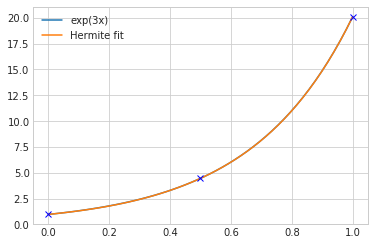

In [145]:
x = np.linspace(0, 1)
y_true = f(x)
y_fit = np.polyval(p, x)
plt.plot(x, y_true, label='exp(3x)')
plt.plot(x, y_fit, label='Hermite fit')
plt.plot(x_, y_, 'bx')
plt.legend()

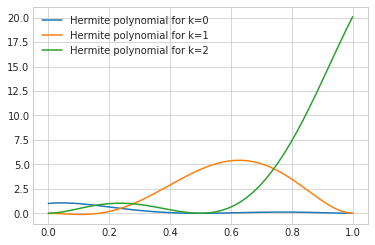

In [148]:
for i in range(3):
    plt.plot(x, np.polyval(ps[i], x), label='Hermite polynomial for k={}'.format(i))
plt.legend()

# 4)

Consider linear interpolation of $f(x) = x^3$ at $x_0 = 0$ and $x_1 = 1$. 

## a)

For given $x$, find the value of $\xi=\xi(x)$ for which
$$
f(x) - p_{1}(x) = \frac{f''(\xi)}{2}(x - x_0)(x-x_1).
$$

### Answer

$p_1(x) = x$ is just the line joining the points $(0, 0)$ and $(1, 1)$.

$f''(x) = 6x$.

This corresponds to the value of $\xi$ which solves

$$x^3 - x = \dfrac{6\xi}{2}x(x-1)$$.

This simplifies to the equation $x + 1 = 3\xi$.

Thus $\xi(x) = \dfrac{x + 1}{3}$. Though $0$ is also a solution, $\xi > 0$.

## b)

Repeat for $f(x) = (2x-1)^4$.

### Answer

$f(0) = 1, f(1) = 1$. Thus $p_1(x) = 1$.

$f''(x) = 48(2x - 1)^2$.

This corresponds to the value of $\xi$ which solves
$$(2x-1)^4 - 1 = 24(2\xi - 1)^2x(x-1)$$

The coefficients for the polynomial $(2x - 1)^4$ can be computed numerically:

In [152]:
_ = np.polynomial.polynomial.polypow([2, -1], 4)
_

array([ 16., -32.,  24.,  -8.,   1.])

We can then compute the coefficients of the $x$-polynomial.

In [154]:
np.polydiv(np.polysub(_, 1), [1, -1, 0])

(array([ 16., -16.,   8.]), array([0.]))

Then by solving for $\xi$, we can derive the equation 
$$\xi = \dfrac{\sqrt{\frac{2}{3}x^2 - \frac{2}{3}x + 8}}{2}$$

# 5)

Interpolate the function
$$
f(x) = \begin{cases}
1 \quad \text{ if } x \geq 0 \\
0 \quad \text{ if } x<0,
\end{cases}
$$
on the domain $[-1,1]$ using Lagrange polynomials  with Chebyshev points.

### Answer

Unfortunately the Python scipy Lagrange interpolation scheme is numerically unstable, so I can't do n > 32.

In [181]:
def chebyshev(n, a, b):
    return 1/2 * (a + b) + 1/2 * (b - a) * np.cos((np.arange(n + 1) + 1/2) * math.pi / (n+1))

In [182]:
from scipy.interpolate import lagrange

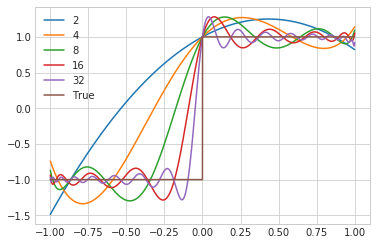

In [189]:
x = np.linspace(-1, 1, num=5000)
values = []
for n in 2**(np.arange(5) + 1):
    points = chebyshev(n, -1, 1)
    polynomial = lagrange(points, np.sign(points))
    current_values = np.polyval(polynomial, x)
    values.append(current_values)
    plt.plot(x, current_values, label=n)
plt.plot(x, np.sign(x), label='True')
plt.legend()

Qualitatively, the polynomials are getting closer to the true function as the number of data points being used to interpolate get larger.

In [199]:
l_inf_error = []
l_2_error = []
for i in range(len(values)):
    l_inf_error.append(np.max(values[i] - np.sign(x)))
    l_2_error.append(np.sqrt(np.sum((values[i] - np.sign(x))**2)))

In [200]:
l_inf_error

[1.99976896034039,
 1.9995791709217912,
 1.99921661111456,
 1.998503611860069,
 1.9970829486527562]

In [201]:
l_2_error

[61.49334567108466,
 48.036742755589074,
 36.04439422994071,
 26.345358711328917,
 18.97878866151752]

The max-norm should not be expected to converge to 0, since the polynomial will always smoothly move from y = -1 to y = 1 in a small neighborhood about x = 0. This means that the max-norm converges to 2 as n goes to infinity and the jump becomes sharper. 

The 2-norm, on the other hand, should converge to 0 as n goes to infinity.